In [1]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt


0.7089818384790961


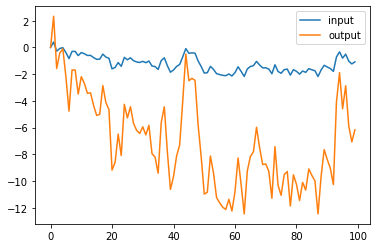

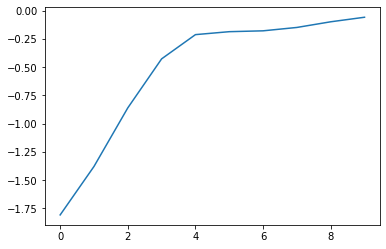

In [126]:
class linear_system(object):
    def __init__(self,A,B,C,K,sigma_v =1,sigma_w =1):
        self.A = A
        self.B = B
        self.C = C
        self.K = K #this is the feedback constant
        self.sigma_v = sigma_v
        self.sigma_w = sigma_w
        
    def return_markov_parameters(self,lim = 10):
        params = []
        for i in range(lim):
            params.append(self.C.dot(np.linalg.matrix_power(self.A,i).dot(self.B)))
        return params
    
    def run_system(self, num_iter = 1000):
        
        x = np.zeros(len(self.B))
        
        y = np.zeros(num_iter)
        
        u= 0
        
        us = np.zeros(num_iter)
        
        ws = np.zeros(num_iter)
        w = np.random.normal(0,1)
        ws[0] = w
        
        for i in range(1,num_iter):
            
            
            
            
            x = self.A.dot(x) + self.B*u + self.B*w
            
            
            
#             print(self.C.dot(x))
#             assert False
            
            y[i] = self.C.dot(x)+np.random.normal(0,self.sigma_v)
            
            u = self.K*y[i]
            
            us[i] = u
            
            w = np.random.normal(0,1)
            
            ws[i] = w
            
            
            
            
            
        return ws, us, y
    
    def solve_for_parameters(self,us,ws,y,lim = 10, num_samps = 70):
        
        #need to construct these matrices
        
        Wmatrix = np.zeros((num_samps,lim))
        Umatrix = np.zeros((num_samps,lim))
        Ymatrix = np.zeros(num_samps)
        
        Ymatrix = y[lim:num_samps+lim]
        assert num_samps +lim < len(y), 'looks like num_samps or lim is too big'
        
        for i in range(num_samps):
            Wmatrix[i,:] = ws[i:i+lim]
            Umatrix[i,:] = us[i:i+lim]
            
        
        
            
        LSsol = np.linalg.inv(Umatrix.T.dot(Wmatrix)).dot(Wmatrix.T.dot(Ymatrix))
        return LSsol
            
    #okay now can we figure out how this changes as we fix lim and increase the number of samps
        
np.random.seed(42)

A = np.random.normal(.05,.25,(5,5))/.7
B = np.random.normal(0,1,(5,))
C = np.random.normal(0,1,(5,))
K = np.random.normal(0,1)/7
# print(K)


# print(A.dot(np.array([1,2])))
# assert False


print(np.max(np.abs(np.linalg.eigvals(A))))



linsystest = linear_system(A,B,C,K)

ws,us,y = linsystest.run_system()

plt.figure()
plt.plot(us[:100],label = 'input')
plt.plot(-y[:100],label = 'output')
plt.legend()
plt.show()

#okay now let's see if we can actually get good results with instrumental variables

plt.plot(linsystest.return_markov_parameters())





    
    
    

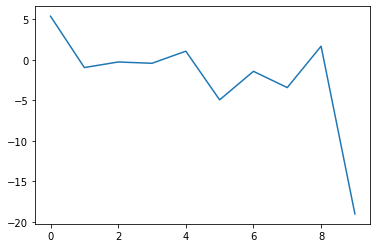

In [127]:
plt.plot(linsystest.solve_for_parameters(us,ws,y))

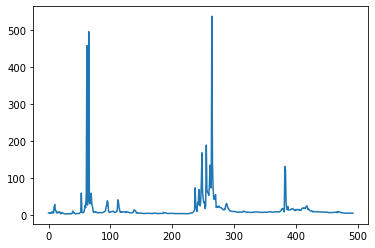

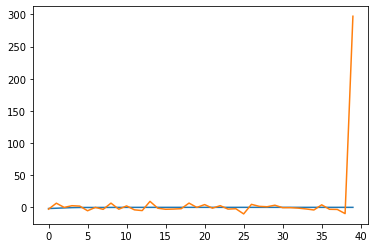

In [130]:
error = []

ws,us,y = linsystest.run_system(num_iter=10000)

g = np.array(linsystest.return_markov_parameters(lim=40))

for i in range(70,5000,10):
    LSsol = linsystest.solve_for_parameters(us,ws,y,lim = 40,num_samps = i)
    
    e = np.linalg.norm(LSsol[1:-1] - g[1:-1])

    error.append(e)
    
plt.plot(error)

plt.figure()
plt.plot(g)
plt.plot(linsystest.solve_for_parameters(us,ws,y,lim = 40,num_samps = 8000))


In [132]:
import pandas as pd

dfcpicanada = pd.read_csv('CANCPIALLMINMEI.csv')

In [134]:
cpivals = dfcpicanada['CANCPIALLMINMEI'].values

inflation = np.zeros(len(cpivals))

inflation[0] = 0
for i in range(1,len(inflation)):
    inflation[i] = (cpivals[i]-cpivals[i-1])/cpivals[i-1]

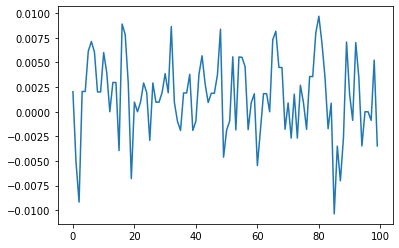

In [137]:
plt.plot(inflation[500:600])

In [139]:
#let's just see if we can't get this to work in an hour...
#first thing's first, we need to get the interest rate data:

dfinterest = pd.read_csv('cbpol_2022/MonthlySeries.csv')

FileNotFoundError: [Errno 2] File cbpol_2022/MonthlySeries.csv does not exist: 'cbpol_2022/MonthlySeries.csv'